###**Mounting Google Drive**

In [57]:
# from google.colab import drive
# drive.mount('/content/drive')

In [58]:
rand_state = 42 # 42

###**Import Libraries**

In [59]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [60]:
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_test,y_pred,uniqueclassLabel, title="CMatrix"):
  cm = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=uniqueclassLabel)
  plt.figure(figsize=(5,4))
  plt.title(title)
  #ax = plt.subplot()
  sns.heatmap(cm, annot=True,cmap='Blues',
              yticklabels=uniqueclassLabel,xticklabels=uniqueclassLabel,fmt='3g')

###**Import Utility File**

In [61]:
# import sys
# path = "/content/drive/MyDrive/Colab Notebooks/Project_Dissertation"
# sys.path.insert(0,path + "/Code")
# import morningStarUtilities

In [62]:
user = 'nishitgala89'
repo = 'ProjectDissertation'
src_dir = "Code/utilities"
pyfile = "morningStarUtilities.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2022-01-04 09:57:23--  https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/utilities/morningStarUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6484 (6.3K) [text/plain]
Saving to: ‘morningStarUtilities.py’

morningStarUtilitie 100%[===================>]   6.33K  --.-KB/s    in 0.001s  

2022-01-04 09:57:23 (7.89 MB/s) - ‘morningStarUtilities.py’ saved [6484/6484]



In [63]:
# import subprocess

# result = subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)
# print(result.stderr.decode("utf-8"))

import morningStarUtilities

### **Import Training Data**

In [64]:
# uploaded = files.upload()
# train_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_train_withoutM60.csv']))
# train_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")
train_df = pd.read_csv("https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")

### **Import Testing Data**

In [65]:
# uploaded = files.upload()
# test_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_test_withoutM60.csv']))
#test_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv").set_index("SecId")
test_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv').set_index("SecId")

In [66]:
train_df

,Name,StarRatingM255,SustainabilityRank,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Cat_Flex-Cap,Cat_Income,Cat_Large-Cap,Cat_Mid_Small-Cap,Cat_Miscellaneous,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F000005ETU,Barings Europe Select A EUR Acc,3,4,0.0,0.85,5.10,9.42,21.86,16.19,38.51,9.65,5.00,1.55,0.34,16.67,1.429875e+09,3978.65175,2,0.16,0.88,96.29,17.05,0.57,3,3,3.0,0,0,0,0,1,0,2,3
F0GBR061MQ,Schroder ISF Sust Swiss Eq C Acc CHF,2,2,0.0,1.93,8.73,10.76,18.20,14.37,27.85,6.80,1.00,1.06,0.08,15.83,3.204443e+07,29776.97728,4,-7.08,1.10,85.04,12.23,0.57,2,3,3.0,0,0,0,0,0,1,1,2
F00000ZS1K,Berenberg European Small Cap B,5,2,0.0,0.15,2.60,11.32,25.96,17.16,51.01,19.50,0.00,0.24,0.23,3.67,6.737833e+08,1698.74791,3,10.19,0.99,86.05,21.60,0.92,3,3,3.0,0,0,0,0,1,0,3,3
F000000ITQ,Candriam Eqs L Eurp Optm Qual I EUR Cap,3,4,0.0,0.79,1.74,7.45,11.52,9.99,21.32,7.40,0.00,0.75,0.22,7.17,8.404491e+08,20347.16148,1,-3.22,0.92,93.88,12.45,0.55,2,3,3.0,0,0,0,1,0,0,1,3
F00000SX9M,Janus Henderson INTECH EurpCor A2 EUR,5,3,0.0,0.66,4.99,9.64,20.98,17.27,37.58,8.79,5.00,1.75,1.05,7.42,1.182744e+08,17329.54942,3,1.56,0.95,92.89,15.08,0.54,3,3,3.0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F00000XH8D,ASSII-Europ Focus Eq B Acc GBP,3,3,0.0,0.82,3.94,3.87,7.06,5.43,21.80,4.88,5.00,1.03,0.40,1.92,1.041660e+07,34607.87874,3,-1.06,0.99,91.43,16.16,0.36,2,3,3.0,0,0,0,1,0,0,1,3
F0GBR04BDY,MS INVF European Property A,1,5,0.0,1.71,6.65,15.12,20.83,18.35,29.84,1.29,5.75,1.65,0.26,23.75,3.776127e+07,4036.57364,5,-4.73,1.33,89.06,24.26,0.10,3,1,3.0,0,0,0,0,0,1,2,1
F0GBR04SFG,MSMM European Small Cap A,2,3,0.0,-0.06,0.54,9.39,24.04,18.01,43.01,5.45,5.00,2.13,0.59,2.25,5.323047e+07,2464.49043,4,-3.74,1.05,98.54,20.81,0.31,2,2,2.0,0,0,0,0,1,0,2,2


In [67]:
train_df.groupby("StarRatingM255")['GBRReturnM36'].agg(['mean','min','max'])

,mean,min,max
StarRatingM255,,,
1,0.522333,-11.74,8.57
2,3.529188,-4.60,14.50
3,6.013062,-3.30,19.63
4,7.636444,1.06,20.11
5,10.041905,1.75,21.59


### **Defining Training, Testing varibales**

In [68]:
# imp_features = ['SustainabilityRank','GBRReturnM1','GBRReturnM3','GBRReturnM0','GBRReturnM12','GBRReturnM36','OngoingCostActual','TransactionFeeActual','FundTNAV',
# 'AverageMarketCapital','MorningstarRiskM255','AlphaM36','BetaM36','R2M36','StandardDeviationM36','ManagerTenure','SharpeM36','Size','Style']
imp_features = ['SustainabilityRank','GBRReturnM1','GBRReturnM3','GBRReturnM0','GBRReturnM36','OngoingCostActual','TransactionFeeActual','FundTNAV',
'AverageMarketCapital','MorningstarRiskM255','AlphaM36','BetaM36','StandardDeviationM36','SharpeM36','Size','Style']
X_train = train_df[imp_features]
y_train = train_df['StarRatingM255']

X_test = test_df[imp_features]
y_test = test_df['StarRatingM255']

In [69]:
X_train.shape, y_train.shape

((886, 16), (886,))

In [70]:
# X_train = train_df.drop(['StarRatingM255','Name'],axis=1)
# y_train = train_df[['StarRatingM255']]
# X_test = test_df.drop(['StarRatingM255','Name'],axis=1)
# y_test = test_df[['StarRatingM255']]
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

### **Scaling the Data**

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Verify the Training and Testing distribution as per Target Variable**

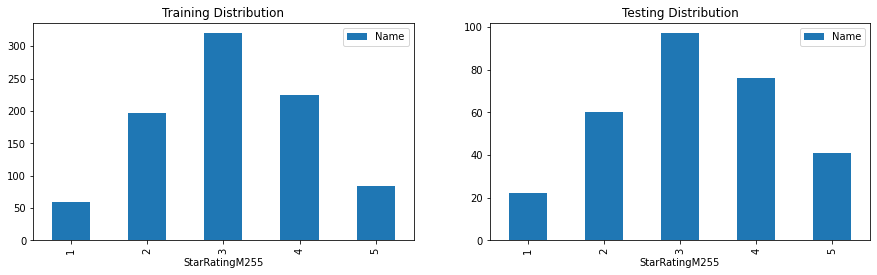

In [72]:
morningStarUtilities.displayBarSubPlots([train_df,test_df],["Training Distribution", "Testing Distribution"],
                   "StarRatingM255")

### **Creating runtime variables**

In [73]:
unique_class_label = list(train_df.StarRatingM255.unique())
unique_class_label.sort()
unique_class_label

[1, 2, 3, 4, 5]

In [74]:
cv_accuracy_metrics = []
cv_balanced_metrics = []
cv_f1_metrics = []

In [75]:
cv_mean = []
cv_std = []
cv_bal_mean = []
cv_bal_std = []
f1_w_mean = []
f1_w_std = []

### **Defining Classifiers**

In [76]:
!pip install catboost

In [77]:
train_df.shape

(886, 34)

In [78]:
wt_df = train_df.groupby("StarRatingM255")[['GBRReturnM36']].count()
wt_df.rename(columns={"GBRReturnM36" : "Class_Samples"},inplace=True)
wt_df

,Class_Samples
StarRatingM255,
1,60
2,197
3,320
4,225
5,84


In [79]:
# Calculating class weights

# Total Samples (T) = 886, 
#Individual class samples = t
# number of classes = n
# Formula : Cw =  T / (t * n)

In [80]:
total_samples = train_df.shape[0]
no_of_class = len(unique_class_label)
def custom_class_wt(individual_class_samples):
  return total_samples / (no_of_class * individual_class_samples)

class_wt = {}
class_wt_0index = {}

for index, row in wt_df.iterrows(): 
  class_wt[index] = custom_class_wt(row['Class_Samples'])
  class_wt_0index[index-1] = custom_class_wt(row['Class_Samples'])

class_wt , class_wt_0index


({1: 2.953333333333333,
  2: 0.899492385786802,
  3: 0.55375,
  4: 0.7875555555555556,
  5: 2.1095238095238096},
 {0: 2.953333333333333,
  1: 0.899492385786802,
  2: 0.55375,
  3: 0.7875555555555556,
  4: 2.1095238095238096})

In [81]:
# # # Setting Manual class weights
# from catboost import CatBoostClassifier
# clfs = []
# clfs.append(RandomForestClassifier(n_estimators=1015,max_depth=5, max_features=0.6387658534305876,random_state=rand_state, criterion="entropy",class_weight=class_wt))
# clfs.append(CatBoostClassifier(verbose=False, random_state=rand_state,class_weights=class_wt))
# clfs.append(AdaBoostClassifier(n_estimators=100,random_state=rand_state,learning_rate=0.8,
#                                base_estimator=DecisionTreeClassifier(max_depth=5, random_state=rand_state, max_features=0.65, criterion="entropy", class_weight=class_wt)))
# clfs.append(BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000, random_state=rand_state, class_weight=class_wt_0index),bootstrap_features=False,
#                              max_features=0.7,max_samples=0.6, n_estimators=500, n_jobs=-1))
# clfs.append(LogisticRegression(max_iter=1000,random_state=rand_state,class_weight= class_wt ))
# clfs.append(SVC(probability=True, random_state=rand_state,class_weight=class_wt))
# clfs.append(XGBClassifier(n_estimators=250, max_depth=10, random_state=rand_state,verbose=1,learning_rate=0.001,
#                            verbosity=1,booster='dart', normalize_type='forest', rate_drop = 0.3, subsample = 0.4,
#                            objective='multi:softprob', class_weights=class_wt_0index))
# len(clfs)

In [82]:
from catboost import CatBoostClassifier
clfs = []
clfs.append(RandomForestClassifier(n_estimators=350,max_depth=8, max_features=0.64,
                                    random_state=rand_state, criterion="entropy", class_weight=class_wt))
clfs.append(CatBoostClassifier(verbose=False, random_state=rand_state, class_weights=class_wt, learning_rate=0.01, loss_function='MultiClass',
                               n_estimators =300))
clfs.append(XGBClassifier(n_estimators=250, max_depth=10, random_state=rand_state,verbose=1,learning_rate=0.001,
                           verbosity=1,booster='dart', normalize_type='forest', rate_drop = 0.3, subsample = 0.4,
                           objective='multi:softprob', class_weights=class_wt_0index))
clfs.append(BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000, random_state=rand_state, class_weight=class_wt_0index),bootstrap_features=False,
                              max_features=0.7,max_samples=0.6, n_estimators=250, n_jobs=-1))
clfs.append(LogisticRegression(max_iter=1000,random_state=rand_state,class_weight=class_wt ))
# clfs.append(SVC(probability=True, random_state=rand_state,class_weight=class_wt))
clfs.append(GradientBoostingClassifier(n_estimators= 400,random_state=rand_state,learning_rate=0.005, max_features = 0.64, min_samples_split=10, min_samples_leaf=25))
len(clfs)

6

In [83]:
X_train.shape, y_train.shape

((886, 16), (886,))

In [84]:
scaled_clf = ['LogisticRegression', 'SVC', 'BaggingClassifier']

### **5-Fold Cross Validation**

In [85]:
skf = StratifiedKFold(n_splits=5, random_state=rand_state, shuffle=True)
for clf in clfs:
  if clf.__class__.__name__  in scaled_clf:
    cv_accuracy_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'accuracy',
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_balanced_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'balanced_accuracy', 
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_f1_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'f1_weighted', 
                                      cv = skf,verbose=2,n_jobs=-1))
  
  else:

    cv_accuracy_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'accuracy',
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_balanced_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'balanced_accuracy', 
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_f1_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'f1_weighted', 
                                      cv = skf,verbose=2,n_jobs=-1))
for clf_result in cv_accuracy_metrics:
  cv_mean.append(clf_result.mean())
  cv_std.append(clf_result.std())

for clf_result in cv_balanced_metrics:
  cv_bal_mean.append(clf_result.mean())
  cv_bal_std.append(clf_result.std())

for clf_result in cv_f1_metrics:
  f1_w_mean.append(clf_result.mean())
  f1_w_std.append(clf_result.std())

result_df = pd.DataFrame({'Classifier' :  [clf.__class__.__name__  for clf in clfs],
                          'CV_Accuracy Mean': cv_mean,'CV_Accuracy Std' : cv_std,
                          'CV_Bal_Accuracy Mean': cv_bal_mean,'CV_Bal_Accuracy Std' : cv_bal_std,
                          'CV_f1_weighted Mean': f1_w_mean,'V_f1_weighted Std' : f1_w_std
                          })

result_df.sort_values(by='CV_Accuracy Mean',ascending=False, ignore_index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_

,Classifier,CV_Accuracy Mean,CV_Accuracy Std,CV_Bal_Accuracy Mean,CV_Bal_Accuracy Std,CV_f1_weighted Mean,V_f1_weighted Std
5,GradientBoostingClassifier,0.510169,0.021558,0.454402,0.037336,0.504725,0.021507
4,LogisticRegression,0.477446,0.022281,0.518650,0.033653,0.476561,0.023019
2,XGBClassifier,0.477420,0.032557,0.422372,0.043924,0.471197,0.034774
0,RandomForestClassifier,0.469561,0.033089,0.449025,0.019840,0.465913,0.031874
3,BaggingClassifier,0.467289,0.028527,0.521727,0.024699,0.472293,0.027148
1,CatBoostClassifier,0.459386,0.035327,0.511391,0.029976,0.455288,0.037524


## **Prediction Run**

Accuracy Score for RandomForestClassifier  0.4831081081081081
F1 Score for RandomForestClassifier  0.47918966063004736
Accuracy Score for CatBoostClassifier  0.4831081081081081
F1 Score for CatBoostClassifier  0.4835986912172415
Accuracy Score for XGBClassifier  0.4864864864864865
F1 Score for XGBClassifier  0.4804244872879516
Accuracy Score for BaggingClassifier  0.5472972972972973
F1 Score for BaggingClassifier  0.5454746601622611
Accuracy Score for LogisticRegression  0.5101351351351351
F1 Score for LogisticRegression  0.510018382283198
Accuracy Score for GradientBoostingClassifier  0.5101351351351351
F1 Score for GradientBoostingClassifier  0.4975895423506887


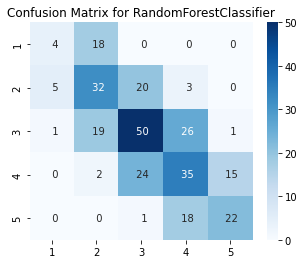

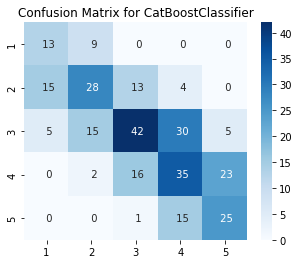

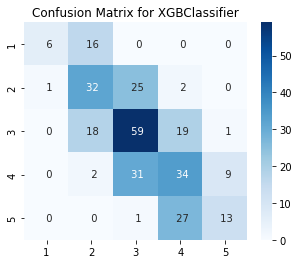

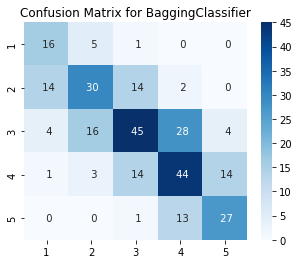

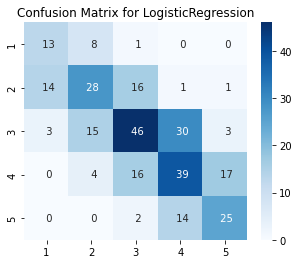

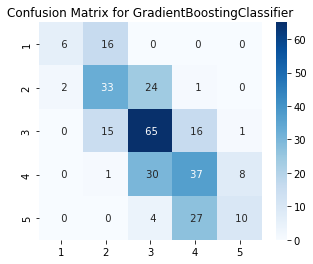

In [86]:
test_acc_score=[]
test_f1_score=[]
clfList = [clf.__class__.__name__  for clf in clfs]


def run_predict(clf):
  if clf.__class__.__name__ in scaled_clf:
    clf = clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
  else:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  plot_conf_matrix(y_test,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
  print("Accuracy Score for " +  clf.__class__.__name__ + "  " 
        + str(accuracy_score(y_test,y_pred)) )
  print("F1 Score for " + clf.__class__.__name__ + "  " + 
        str(f1_score(y_test, y_pred, average='weighted')))
  
  test_acc_score.append(accuracy_score(y_test,y_pred))
  test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))
  
for clf in clfs:
  run_predict(clf)



In [87]:
result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
3,BaggingClassifier,0.547297,0.545475
4,LogisticRegression,0.510135,0.510018
5,GradientBoostingClassifier,0.510135,0.497590
2,XGBClassifier,0.486486,0.480424
0,RandomForestClassifier,0.483108,0.479190
1,CatBoostClassifier,0.483108,0.483599


## **Prediction using Pre-trained Neural Network Model**

In [88]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Fetching the Saved Model JSON File from Github

In [89]:
import requests, json
from  urllib.request import Request, build_opener
#url = 'https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model.json'
url = 'https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/With_Class_Weights/model_v2.json'
req = Request(url)
opener = build_opener()
f = opener.open(req)
with open('ann_model.json', 'w') as json_file:
    json.dump(json.loads(f.read()), json_file)

In [90]:
with open('/content/ann_model.json', 'r') as model_file:
  json_saved_model = model_file.read()
network_loaded = tf.keras.models.model_from_json(json_saved_model)

### Fetching the Model Weights from Github

In [91]:
src_dir = "Code/4_Modelling/Artificial_Neural_Network/Final_Models/With_Class_Weights"
weight_file = "model_weights_v2.hdf5"
url = f"https://github.com/{user}/{repo}/blob/main/{src_dir}/{weight_file}?raw=true"

!wget --no-cache --backups=1 {url}

--2022-01-04 10:05:02--  https://github.com/nishitgala89/ProjectDissertation/blob/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/With_Class_Weights/model_weights_v2.hdf5?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nishitgala89/ProjectDissertation/raw/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/With_Class_Weights/model_weights_v2.hdf5 [following]
--2022-01-04 10:05:02--  https://github.com/nishitgala89/ProjectDissertation/raw/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/With_Class_Weights/model_weights_v2.hdf5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/With_Class_Weights/model_weights_v2.hdf

In [92]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                221       
                                                                 
 dense_1 (Dense)             (None, 15)                210       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 50        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable pa

In [93]:
import os
fileNames = list(os.listdir())
fileNames
for fname in fileNames:
  if fname.startswith('model_weights'):
    fsplit = fname.split("?")
    os.rename(fname, fsplit[0])

In [94]:
network_loaded.load_weights('/content/model_weights_v2.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [95]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                221       
                                                                 
 dense_1 (Dense)             (None, 15)                210       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 50        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable pa

In [96]:
len(imp_features)

16

In [97]:
y_pred_loaded = network_loaded.predict(X_test_scaled)
y_pred_loaded = np.argmax(y_pred_loaded, axis=1)
y_pred_loaded +=1

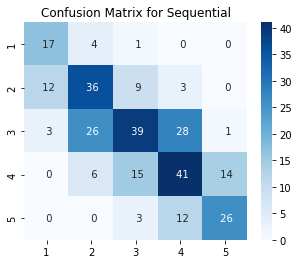

In [98]:
plot_conf_matrix(y_test.values,y_pred_loaded,unique_class_label, title="Confusion Matrix for " + network_loaded.__class__.__name__)

In [99]:
test_acc_score.append(accuracy_score(y_test, y_pred_loaded))
test_f1_score.append(f1_score(y_test, y_pred_loaded, average='weighted'))
clfList.append("Artificial_Neural_Network")

In [100]:
result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
3,BaggingClassifier,0.547297,0.545475
6,Artificial_Neural_Network,0.537162,0.532646
4,LogisticRegression,0.510135,0.510018
5,GradientBoostingClassifier,0.510135,0.497590
2,XGBClassifier,0.486486,0.480424
0,RandomForestClassifier,0.483108,0.479190
1,CatBoostClassifier,0.483108,0.483599


## **Prediction Run for Asia Data (Model Generalization Test as this data is not used in Training)**

In [101]:
asia_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/Generalization_Check_Asia_Developed.csv').set_index("SecId")
asia_df = morningStarUtilities.createSize_InvestmentTypeFeature(asia_df)

In [102]:
asia_df[imp_features].isnull().sum()

SustainabilityRank      0
GBRReturnM1             0
GBRReturnM3             0
GBRReturnM0             0
GBRReturnM36            0
OngoingCostActual       0
TransactionFeeActual    0
FundTNAV                1
AverageMarketCapital    0
MorningstarRiskM255     0
AlphaM36                0
BetaM36                 0
StandardDeviationM36    0
SharpeM36               0
Size                    0
Style                   0
dtype: int64

In [103]:
asia_df[asia_df.FundTNAV.isnull()]

,Name,StarRatingM255,SustainabilityRank,CategoryName,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,GBRReturnM60,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,EquityStyleBox,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F00001071Q,BIEF Emerging Markets A GBP Acc,4,2,Global Emerging Markets Equity,0.62047,1.43,1.64,-3.35,-7.72,0.09,10.79,10.05,NaN,NaN,1.12,1.17,24.08,NaN,2,28614.24791,4,2.47,1.02,89.7,16.24,0.66,3,1,3.0,False,1,2


In [104]:
asia_df.drop(index='F00001071Q',inplace=True)


In [105]:
X_asia = asia_df[imp_features]
y_asia = asia_df['StarRatingM255']
X_asia_scaled = scaler.transform(X_asia)

In [106]:
X_asia.shape, y_asia.shape

((432, 16), (432,))

Accuracy Score for RandomForestClassifier  0.3888888888888889
F1 Score for RandomForestClassifier  0.36376834772985156
Accuracy Score for CatBoostClassifier  0.34953703703703703
F1 Score for CatBoostClassifier  0.31916458053871827
Accuracy Score for XGBClassifier  0.47685185185185186
F1 Score for XGBClassifier  0.4433409167938139
Accuracy Score for BaggingClassifier  0.4351851851851852
F1 Score for BaggingClassifier  0.408333098648701
Accuracy Score for LogisticRegression  0.46064814814814814
F1 Score for LogisticRegression  0.4361362507117961
Accuracy Score for GradientBoostingClassifier  0.4861111111111111
F1 Score for GradientBoostingClassifier  0.45338763918268826


,Classifier,Testing_Accuracy,Testing_F1-score
5,GradientBoostingClassifier,0.486111,0.453388
2,XGBClassifier,0.476852,0.443341
4,LogisticRegression,0.460648,0.436136
3,BaggingClassifier,0.435185,0.408333
0,RandomForestClassifier,0.388889,0.363768
1,CatBoostClassifier,0.349537,0.319165


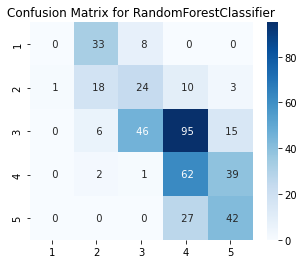

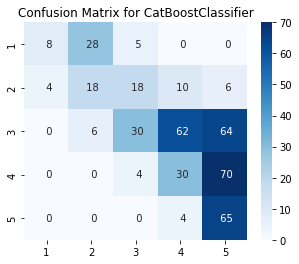

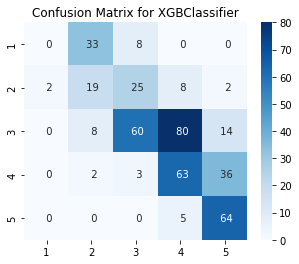

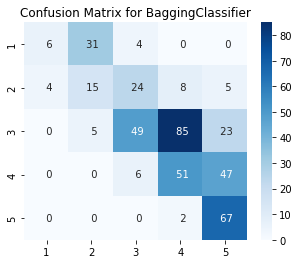

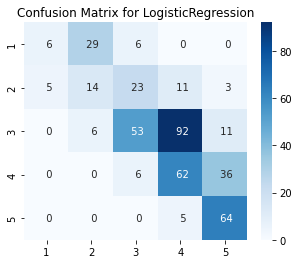

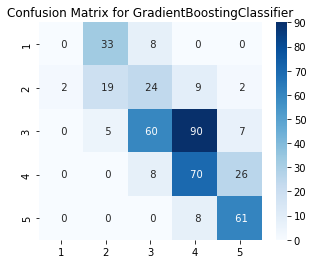

In [107]:
test_acc_score=[]
test_f1_score=[]
clfList = [clf.__class__.__name__  for clf in clfs]


def run_predict_for_untrainedData(clf):
  if clf.__class__.__name__ in scaled_clf:   
    y_pred = clf.predict(X_asia_scaled)
  else:
    y_pred = clf.predict(X_asia)
  plot_conf_matrix(y_asia,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
  print("Accuracy Score for " +  clf.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia,y_pred)) )
  print("F1 Score for " + clf.__class__.__name__ + "  " + 
        str(f1_score(y_asia, y_pred, average='weighted')))
  
  test_acc_score.append(accuracy_score(y_asia,y_pred))
  test_f1_score.append(f1_score(y_asia, y_pred, average='weighted'))
  
for clf in clfs:
  run_predict_for_untrainedData(clf)

result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

In [108]:
y_asia_pred = network_loaded.predict(X_asia_scaled)
y_asia_pred = np.argmax(y_asia_pred, axis=1)
y_asia_pred += 1

In [109]:
print("Accuracy Score for " +  network_loaded.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia.values,y_asia_pred)) )
print("F1 Score for " + network_loaded.__class__.__name__ + "  " + 
        str(f1_score(y_asia.values, y_asia_pred, average='weighted')))

Accuracy Score for Sequential  0.5578703703703703
F1 Score for Sequential  0.5476033607306009


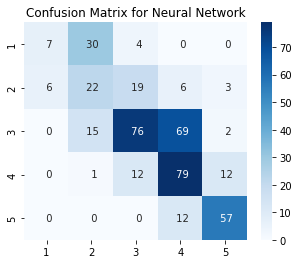

In [110]:
plot_conf_matrix(y_asia,y_asia_pred,unique_class_label, title="Confusion Matrix for Neural Network")

In [111]:
test_acc_score.append(accuracy_score(y_asia,y_asia_pred))
test_f1_score.append(f1_score(y_asia, y_asia_pred, average='weighted'))
clfList.append("Artificial_Neural_Network")

In [112]:
result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
6,Artificial_Neural_Network,0.557870,0.547603
5,GradientBoostingClassifier,0.486111,0.453388
2,XGBClassifier,0.476852,0.443341
4,LogisticRegression,0.460648,0.436136
3,BaggingClassifier,0.435185,0.408333
0,RandomForestClassifier,0.388889,0.363768
1,CatBoostClassifier,0.349537,0.319165
